# Import Pustaka

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Input Data

In [2]:
df = pd.read_excel(r"D:\Kuliah\Semester 6\Analisis Data\healthcare-dataset-stroke-data.xlsx")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
print(f"Number of Rows\t\t: {df.shape[0]}")
print(f"Number of Columns\t: {df.shape[1]}")

Number of Rows		: 499
Number of Columns	: 12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 499 non-null    int64  
 1   gender             499 non-null    object 
 2   age                499 non-null    float64
 3   hypertension       499 non-null    int64  
 4   heart_disease      499 non-null    int64  
 5   ever_married       499 non-null    object 
 6   work_type          499 non-null    object 
 7   Residence_type     499 non-null    object 
 8   avg_glucose_level  499 non-null    float64
 9   bmi                450 non-null    float64
 10  smoking_status     499 non-null    object 
 11  stroke             499 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 46.9+ KB


# Data Cleaning

In [32]:
dr= pd.DataFrame({
    "type":df.dtypes.values,
    "null":df.isnull().sum().values,
    "null_percentage": ["{:.2f}%".format(val) for val in df.isnull().sum().values / len(df) * 100],
    "unique":[df[i].nunique() for i in df.columns],
    "duplicated": df.duplicated().sum(),
    "sample":[list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns]
}).set_index(df.isnull().sum().index).sort_values("null",ascending=False)
dr

,type,null,null_percentage,unique,duplicated,sample
gender,int32,0,0.00%,2,0,1.00
age,float64,0,0.00%,84,0,21.00
hypertension,int64,0,0.00%,2,0,1.00
heart_disease,int64,0,0.00%,2,0,0.00
ever_married,int32,0,0.00%,2,0,0.00
work_type,int32,0,0.00%,4,0,3.00
Residence_type,int32,0,0.00%,2,0,1.00
avg_glucose_level,float64,0,0.00%,445,0,194.37
bmi,float64,0,0.00%,227,0,27.40
smoking_status,int32,0,0.00%,4,0,0.00


In [9]:
# Menghapus baris yang memiliki setidaknya satu nilai yang hilang
df = df.dropna()

In [11]:
num_cols = df.select_dtypes(include=['float64']).columns
print(num_cols)

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')


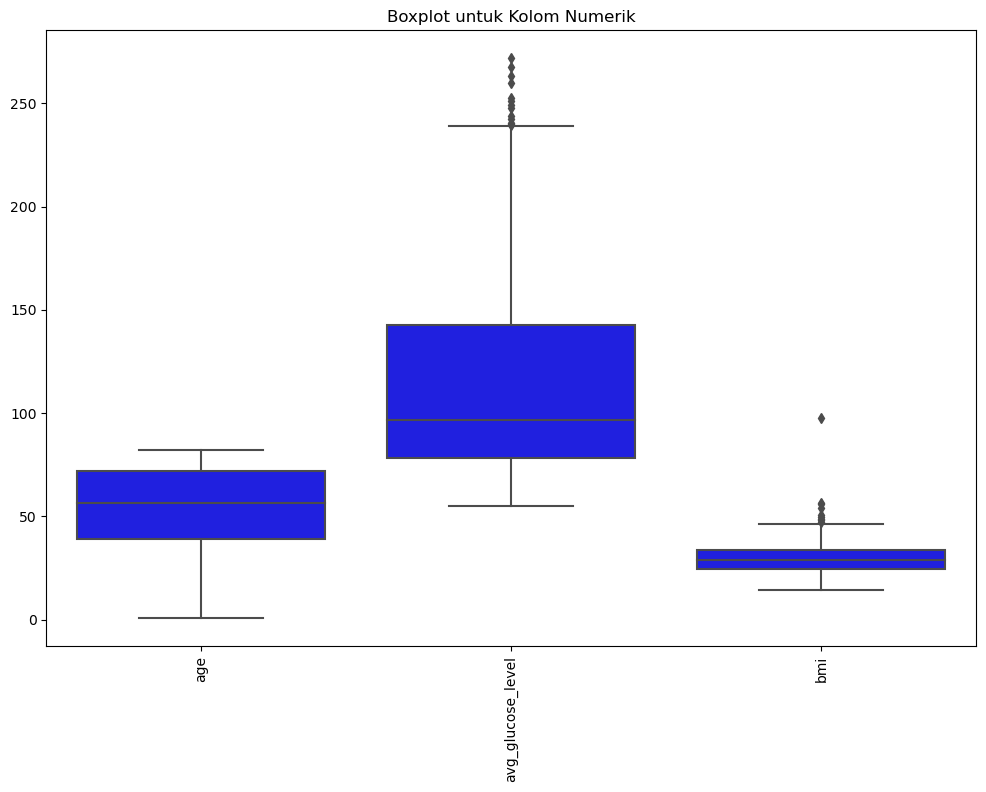

In [12]:
# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(df[num_cols], showfliers=True, color='blue')  # Menghilangkan pencilan untuk melihat lebih jelas
plt.title('Boxplot untuk Kolom Numerik')
plt.xticks(rotation='vertical')  # Memutar label sumbu x
plt.show()

# Exploratory Data Analysis

In [33]:
# Melihat Statistik Dataframe secara umum
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,0.433333,52.945244,0.184444,0.108889,0.733333,1.220000,0.506667,119.140556,29.881111,1.480000,0.464444
std,0.496087,22.611565,0.388278,0.311846,0.442709,0.756884,0.500512,56.129493,7.959862,1.019105,0.499289
min,0.000000,0.720000,0.000000,0.000000,0.000000,0.000000,0.000000,55.220000,14.300000,0.000000,0.000000
25%,0.000000,39.000000,0.000000,0.000000,0.000000,1.000000,0.000000,78.430000,24.625000,1.000000,0.000000
50%,0.000000,56.500000,0.000000,0.000000,1.000000,1.000000,1.000000,96.500000,28.850000,2.000000,0.000000
75%,1.000000,72.000000,0.000000,0.000000,1.000000,2.000000,1.000000,142.860000,33.600000,2.000000,1.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [13]:
# Daftar atribut kategori
kategori_columns = df[['hypertension', 'heart_disease', 'gender', 'work_type', 'Residence_type', 'smoking_status', 'stroke']]

# Hitung dan tampilkan distribusi kategori
for column in kategori_columns:
    distribution = df[column].value_counts() # Menghitung proporsi dalam persen
    print(f'Distribusi {column}:')
    print(distribution)
    print('\n')

Distribusi hypertension:
0    367
1     83
Name: hypertension, dtype: int64


Distribusi heart_disease:
0    401
1     49
Name: heart_disease, dtype: int64


Distribusi gender:
Female    255
Male      195
Name: gender, dtype: int64


Distribusi work_type:
Private          276
Self-employed     84
Govt_job          55
children          35
Name: work_type, dtype: int64


Distribusi Residence_type:
Urban    228
Rural    222
Name: Residence_type, dtype: int64


Distribusi smoking_status:
never smoked       171
Unknown            103
formerly smoked    102
smokes              74
Name: smoking_status, dtype: int64


Distribusi stroke:
0    241
1    209
Name: stroke, dtype: int64




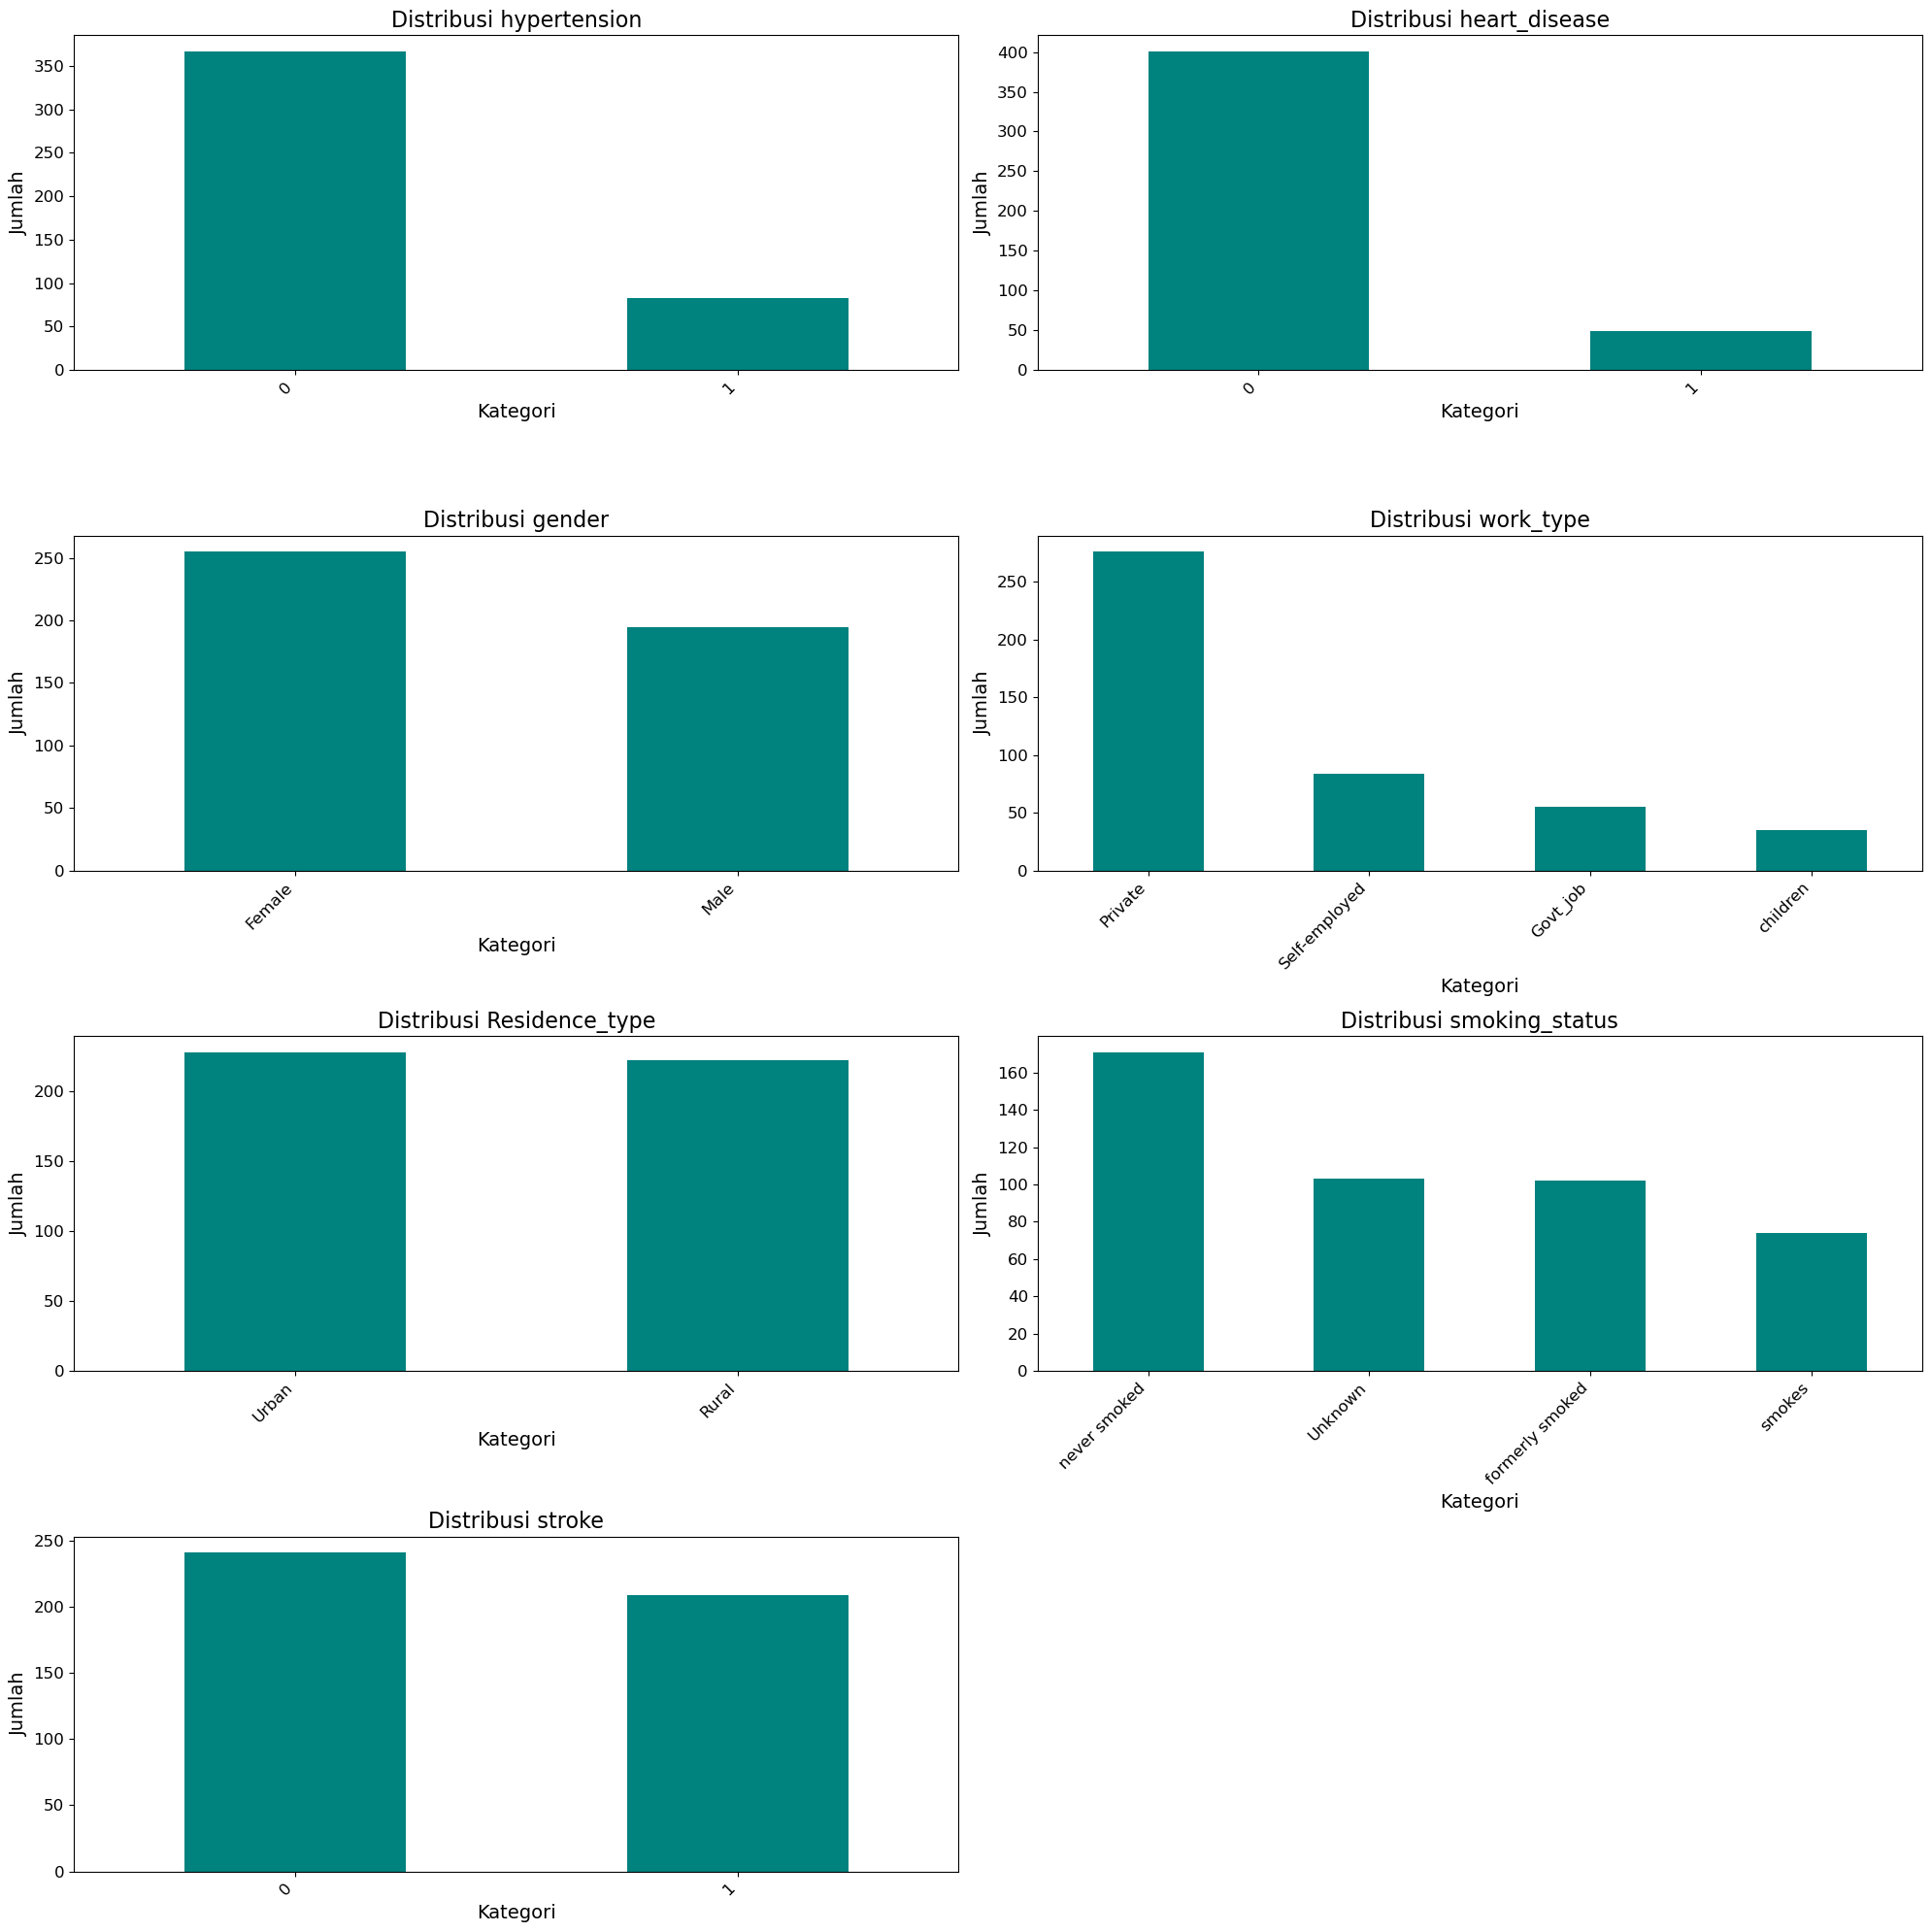

In [14]:
# Daftar atribut kategori
kategori_columns = df[['hypertension', 'heart_disease', 'gender', 'work_type', 'Residence_type', 'smoking_status', 'stroke']]

# Mengatur ukuran gambar
plt.figure(figsize=(20, 20))

# Iterasi melalui kolom kategori
for i, column in enumerate(kategori_columns):
    # Menghitung distribusi kategori
    distribution = df[column].value_counts()

    # Membuat bar plot
    plt.subplot(4, 2, i+1)  # 4 baris, 2 kolom
    distribution.plot(kind='bar', color=["#00827F"])
    plt.title(f'Distribusi {column}', fontsize=16)
    plt.xlabel('Kategori', fontsize=14)
    plt.ylabel('Jumlah', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

# Menampilkan bar plot
plt.tight_layout()
plt.show()

# Data Preprocessing

In [15]:
#Membuat variabel kategori untuk  tipe data category dan boolean
kategori = df.select_dtypes(include=['object']).columns.values

for col in kategori:
    print(col, "(", len(df[col].unique()) , "values):\n", np.sort(df[col].unique()))

gender ( 2 values):
 ['Female' 'Male']
ever_married ( 2 values):
 ['No' 'Yes']
work_type ( 4 values):
 ['Govt_job' 'Private' 'Self-employed' 'children']
Residence_type ( 2 values):
 ['Rural' 'Urban']
smoking_status ( 4 values):
 ['Unknown' 'formerly smoked' 'never smoked' 'smokes']


In [17]:
# encode variabel kategori
label_encoder = LabelEncoder()
for cols in kategori:
    df[cols] = label_encoder.fit_transform(df[cols])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
2,1,80.0,0,1,1,1,0,105.92,32.5,2,1
3,0,49.0,0,0,1,1,1,171.23,34.4,3,1
4,0,79.0,1,0,1,2,0,174.12,24.0,2,1
5,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
494,0,12.0,0,0,0,3,1,82.39,17.1,2,0
495,1,28.0,0,0,1,1,0,169.49,27.2,0,0
496,1,40.0,0,0,1,1,0,80.25,30.3,1,0
497,1,55.0,0,0,1,1,1,203.81,33.9,1,0


In [18]:
# Defenisiskan data
X = df.drop(['stroke'], axis=1)
y = df['stroke']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

# Melakukan proses scaling pada variabel prediktor
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cetak jumlah data pada masing-masing set
print('Shape of X:', X.shape)
print('Shape of Y:', y.shape)
print("Shape of X Train: ", X_train_scaled.shape)
print("Shape of Y Train: ", y_train.shape)
print("Shape of X Test: ", X_test_scaled.shape)
print("Shape of Y Test: ", y_test.shape)

Shape of X: (450, 10)
Shape of Y: (450,)
Shape of X Train:  (337, 10)
Shape of Y Train:  (337,)
Shape of X Test:  (113, 10)
Shape of Y Test:  (113,)


In [19]:
# Menampilkan hasil scaling dengan StandardScaler
print("StandardScaler - Training Set:")
print(X_train_scaled)

StandardScaler - Training Set:
[[0.         0.02179297 0.         ... 0.18256285 0.08523409 0.        ]
 [1.         0.86379396 0.         ... 0.22375483 0.15486194 0.33333333]
 [1.         0.60376424 1.         ... 0.77685717 0.31932773 0.33333333]
 ...
 [1.         1.         0.         ... 0.22756803 0.12845138 0.66666667]
 [0.         0.65329371 1.         ... 0.59123435 0.16086435 0.66666667]
 [0.         0.76473502 0.         ... 0.24122022 0.1152461  0.        ]]


In [20]:
y_train

374    0
24     1
458    0
329    0
17     1
      ..
367    0
231    1
140    1
59     1
209    1
Name: stroke, Length: 337, dtype: int64

In [21]:
X_test_scaled

array([[0.        , 0.69044081, 1.        , ..., 0.05682139, 0.22328932,
        0.66666667],
       [1.        , 0.92570579, 0.        , ..., 0.23128707, 0.07202881,
        0.        ],
       [1.        , 0.26944032, 0.        , ..., 0.28547218, 0.09603842,
        0.66666667],
       ...,
       [0.        , 0.61614661, 0.        , ..., 0.77497411, 0.33613445,
        0.66666667],
       [0.        , 0.78949975, 0.        , ..., 0.21485736, 0.16686675,
        0.33333333],
       [1.        , 0.65329371, 0.        , ..., 0.19597966, 0.17767107,
        1.        ]])

# Decision Tree

In [22]:
# Definisikan parameter yang akan di-tuning
param_grid = {
    'max_depth': [3, 4, 5, 6, 7]
}

In [23]:
# Buat objek GridSearchCV dengan cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [24]:
# Latih model dengan Grid Search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7]}, scoring='accuracy')

In [25]:
# Tampilkan parameter terbaik dan skor terbaik
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Best parameters: {'max_depth': 3}
Best score: 0.7480245829675153


In [26]:
# Ambil model terbaik
best_model = grid_search.best_estimator_

In [27]:
# Prediksi pada data pengujian
y_pred = best_model.predict(X_test)

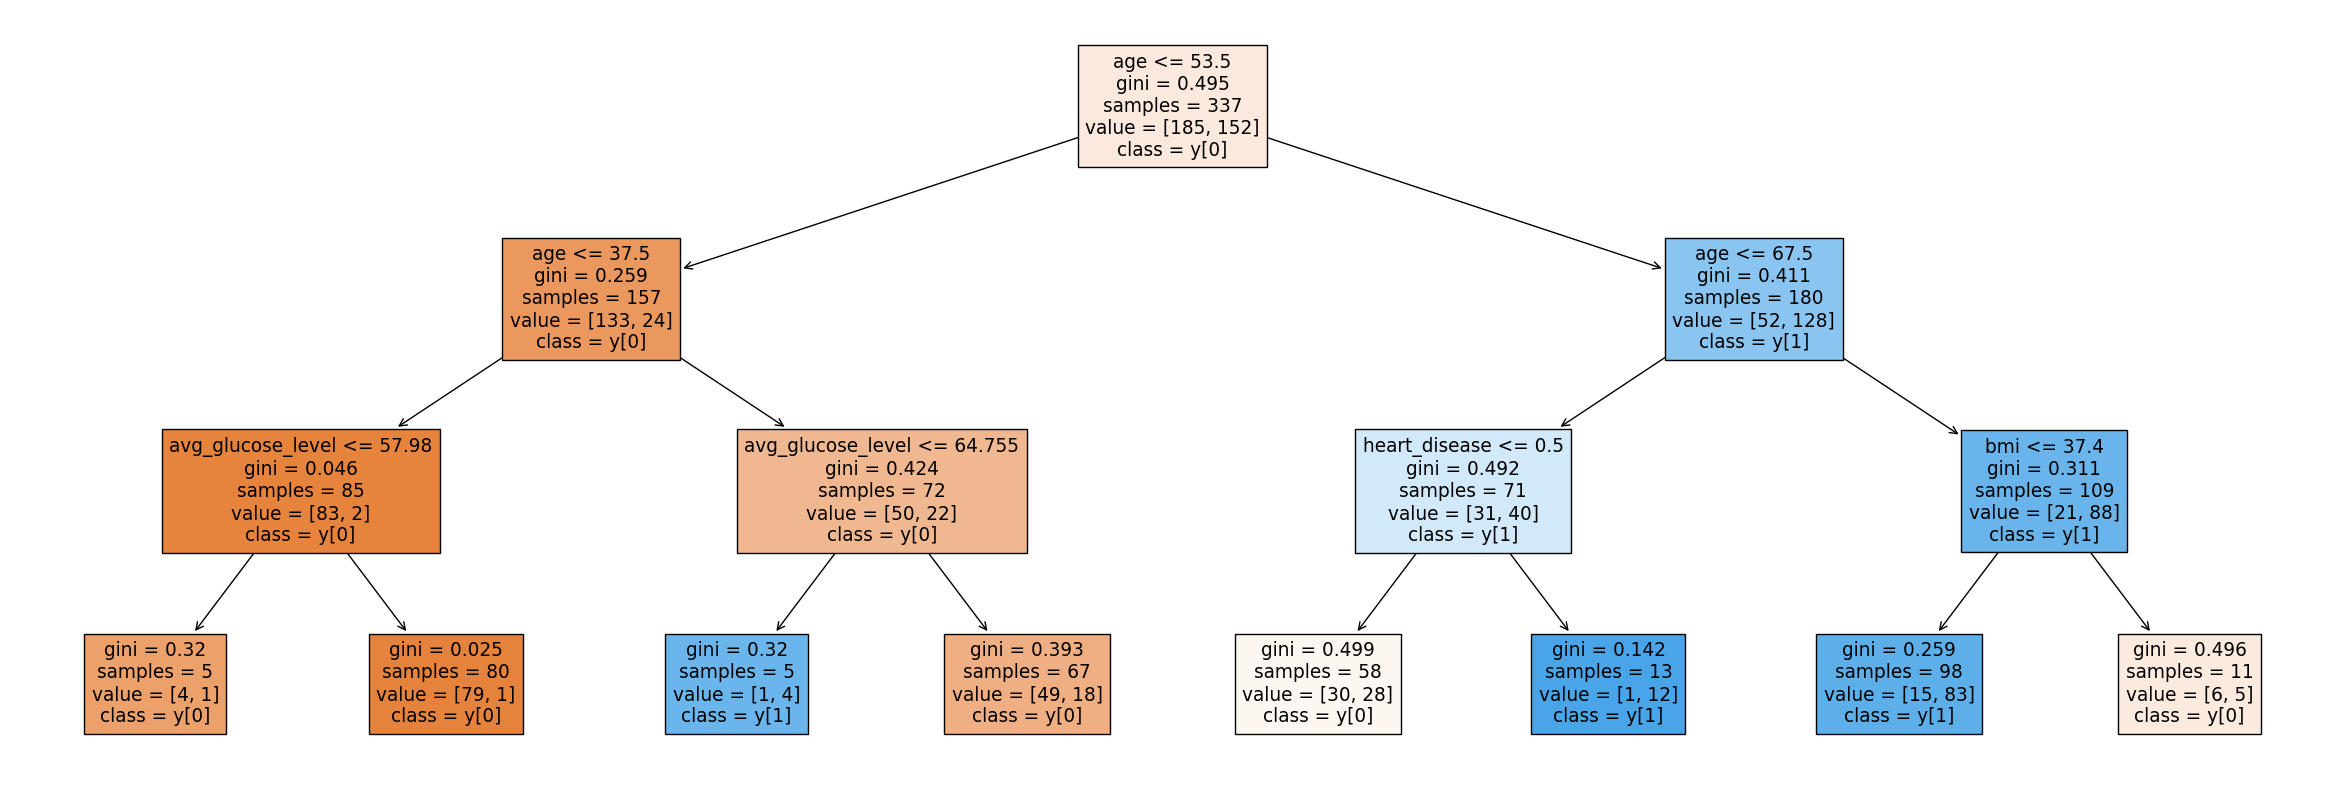

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=True)
plt.show()

In [28]:
# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Akurasi: 0.7079646017699115
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        56
           1       0.76      0.61      0.68        57

    accuracy                           0.71       113
   macro avg       0.72      0.71      0.71       113
weighted avg       0.72      0.71      0.71       113

Confusion Matrix:
[[45 11]
 [22 35]]


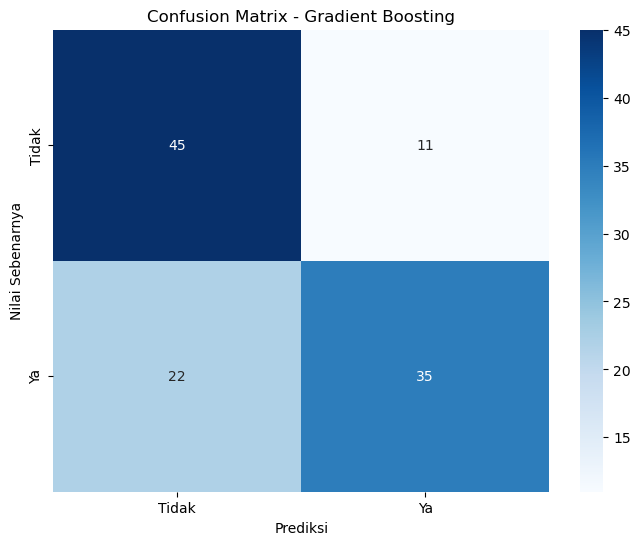

In [29]:
# Membuat confusion matrix
cm_gb = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.xticks([0.5, 1.5], ['Tidak', 'Ya'])
plt.yticks([0.5, 1.5], ['Tidak', 'Ya'])
plt.show()

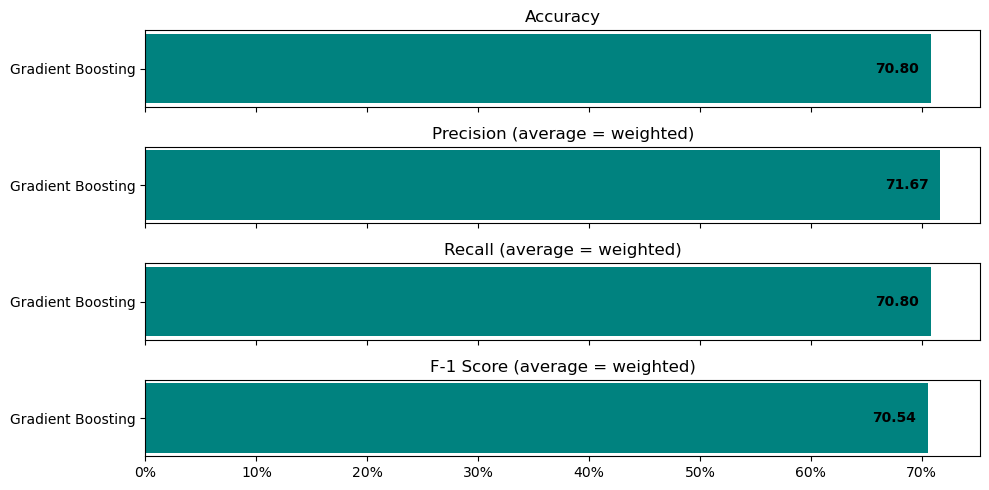

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nrows, ncols = 4, 1
fig, ax = plt.subplots(figsize=(10, 5), dpi=100, nrows=nrows, ncols=ncols, sharex=True)

metrics = []

# Loop melalui metrik untuk SVM
for i in range(nrows):
    if i == 0:
        metric = accuracy_score(y_test, y_pred) * 100
        title = "Accuracy"
    elif i == 1:
        metric = precision_score(y_test, y_pred, average="weighted") * 100
        title = "Precision (average = weighted)"
    elif i == 2:
        metric = recall_score(y_test, y_pred, average="weighted") * 100
        title = "Recall (average = weighted)"
    else:
        metric = f1_score(y_test, y_pred, average="weighted") * 100
        title = "F-1 Score (average = weighted)"

    ax[i].barh("Gradient Boosting", metric, color='#00827F')
    ax[i].set_title(title)

    for container in ax[i].containers:
        ax[i].bar_label(container, fmt="%.2f", padding=-40, color="black", fontweight="bold")

    ax[i].xaxis.set_major_formatter(tick.FuncFormatter(lambda x, _: f"{round(x)}%"))

plt.tight_layout()
plt.show()